Pranav Kumar,
prn 1032200232,
FY BTECH

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/content/Walmart_sales.csv')

In [2]:
print("Dataset shape:", data.shape)
print("Dataset columns:", data.columns)
print("Dataset description:\n", data.describe())

Dataset shape: (6435, 8)
Dataset columns: Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')
Dataset description:
              Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std     

In [3]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


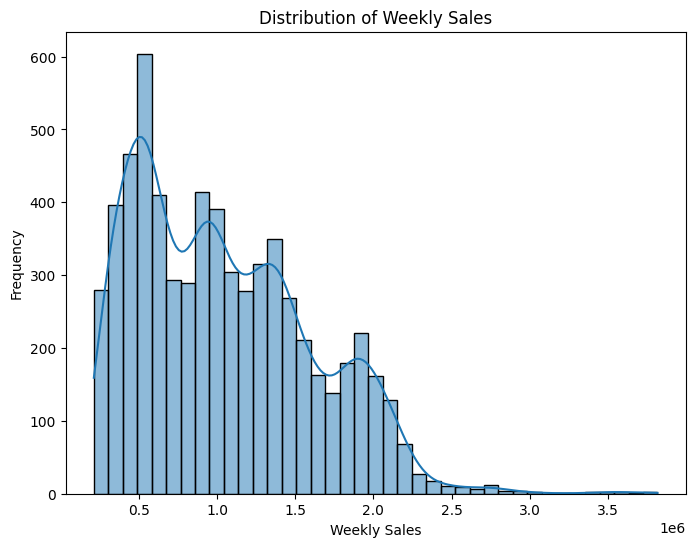

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Weekly_Sales'], kde=True)
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Weekly Sales")
plt.show()

<Figure size 1200x800 with 0 Axes>

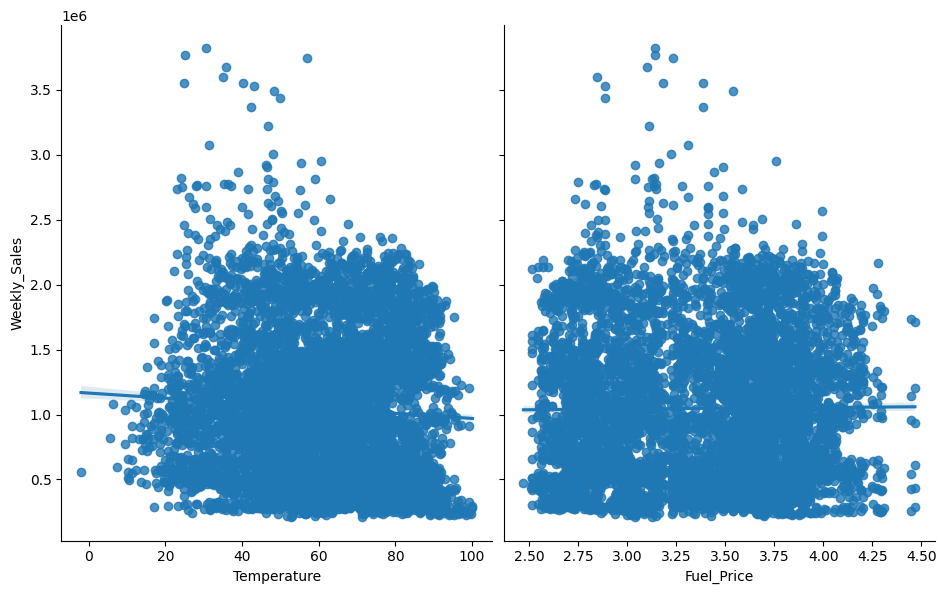

In [7]:
plt.figure(figsize=(12, 8))
sns.pairplot(data, x_vars=['Temperature', 'Fuel_Price'], y_vars='Weekly_Sales', height=6, aspect=0.8, kind='reg')
plt.show()

In [9]:
features = ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X = data[features]
y = data['Weekly_Sales']

In [10]:
from datetime import datetime
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y').timestamp())
X = data.drop('Weekly_Sales', axis=1)
y = data['Weekly_Sales']

In [11]:
X = data.drop('Weekly_Sales', axis=1)
y = data['Weekly_Sales']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 274573999190.1552
Root Mean Squared Error (RMSE): 523998.0908268228
R-squared (R2): 0.1476948355447757


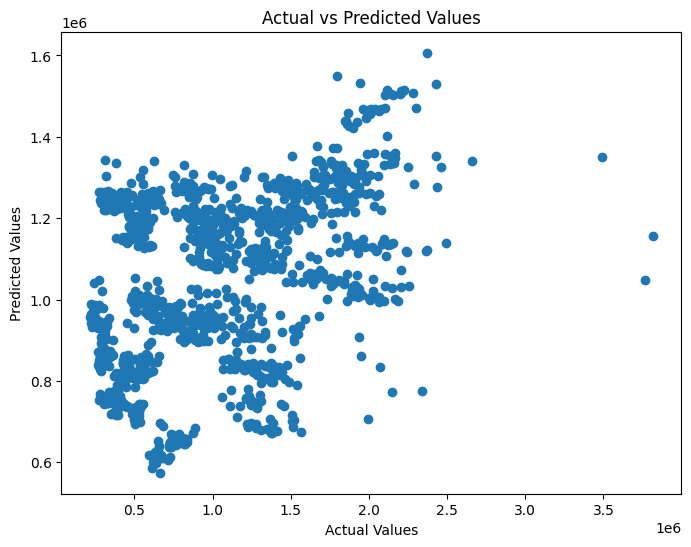

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [13]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Coefficients:\n", coefficients)
print("Intercept:", model.intercept_)

Coefficients:
         Feature   Coefficient
0         Store -15096.223764
1          Date      0.000276
2  Holiday_Flag  74681.061453
3   Temperature   -776.161452
4    Fuel_Price -16392.270266
5           CPI  -2344.933555
6  Unemployment -23804.073368
Intercept: 1723230.0841078535


In [14]:
importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model.coef_)})
importance = importance.sort_values('Importance', ascending=False)
print("Feature Importance:\n", importance)

Feature Importance:
         Feature    Importance
2  Holiday_Flag  74681.061453
6  Unemployment  23804.073368
4    Fuel_Price  16392.270266
0         Store  15096.223764
5           CPI   2344.933555
3   Temperature    776.161452
1          Date      0.000276
